In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.datasets import make_moons, make_blobs as mb, load_breast_cancer as lbc, load_iris as li

In [301]:
def do_Kfold(model,X,y,k,scaler = None, random_state = 146):
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=k, random_state = random_state, shuffle=True)

    train_scores = []
    test_scores = []

    for idxTrain, idxTest in kf.split(X):
        Xtrain = X[idxTrain, :]
        Xtest = X[idxTest, :]
        ytrain = y[idxTrain]
        ytest = y[idxTest]
        if scaler != None:
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

        model.fit(Xtrain,ytrain)

        train_scores.append(model.score(Xtrain,ytrain))
        test_scores.append(model.score(Xtest,ytest))
        
    return train_scores, test_scores

In [302]:
def compare_classes(actual, predicted, names=None):
    '''Function returns a confusion matrix, and overall accuracy given:
            Input:  actual - a list of actual classifications
                    predicted - a list of predicted classifications
                    names (optional) - a list of class names
    '''
    accuracy = sum(actual==predicted)/actual.shape[0]
    
    classes = pd.DataFrame(columns = ['Actual', 'Predicted'])
    classes['Actual'] = actual
    classes['Predicted'] = predicted

    conf_mat = pd.crosstab(classes['Actual'], classes['Predicted'])
    
    if type(names) != type(None):
        conf_mat.index = names
        conf_mat.index.name = 'Actual'
        conf_mat.columns = names
        conf_mat.columns.name = 'Predicted'
    
    print('Accuracy = ' + format(accuracy, '.2f'))
    return conf_mat, accuracy

In [303]:
def plot_groups(points, groups, colors, 
               ec='black', ax='None',s=30, alpha=0.5,
               figsize=(6,6)):
    '''Creates a scatter plot, given:
            Input:  points (array)
                    groups (an integer label for each point)
                    colors (one rgb tuple for each group)
                    ec (edgecolor for markers, default is black)
                    ax (optional handle to an existing axes object to add the new plot on top of)
            Output: handles to the figure (fig) and axes (ax) objects
    '''
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create a new plot, unless something was passed for 'ax'
    if ax == 'None':
        fig,ax = plt.subplots(figsize=figsize)
    else:
        fig = plt.gcf()
    
    for i,lbl in enumerate(np.unique(groups)):
        idx = (groups==lbl)
        ax.scatter(points[idx,0], points[idx,1],color=colors[i],
                    ec=ec,alpha=alpha,label = lbl,s=s)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.legend(bbox_to_anchor=[1, 0.5], loc='center left')
    return fig, ax

In [304]:
def get_colors(N, map_name='rainbow'):
    '''Returns a list of N colors from a matplotlib colormap
            Input: N = number of colors, and map_name = name of a matplotlib colormap
    
            For a list of available colormaps: 
                https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
    '''
    import matplotlib
    cmap = matplotlib.cm.get_cmap(name=map_name)
    n = np.linspace(0,1,N)
    colors = cmap(n)
    return colors

In [305]:
wikipedia = pd.read_csv('data/wikipedia_data_test2.csv', sep = ',')
wikipedia.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Time_Between,Website,Ttruncated
0,1,0.000000,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,2620:0:861:ed1a::1,TLSv1.2,152,Application Data,0.000000,Wikipedia,0.000000
1,2,0.000063,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,2620:0:861:ed1a::1,TLSv1.2,113,Application Data,0.000063,Wikipedia,0.000063
2,3,0.027069,2620:0:861:ed1a::1,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,TCP,74,443 > 54628 [ACK] Seq=1 Ack=118 Win=83 Len=0,0.027006,Wikipedia,0.027006
3,4,0.027436,2620:0:861:ed1a::1,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,TLSv1.2,113,Application Data,0.000367,Wikipedia,0.000366
4,5,0.027828,2620:0:861:ed1a::1,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,TCP,1514,443 > 54628 [ACK] Seq=40 Ack=118 Win=83 Len=...,0.000392,Wikipedia,0.000392


In [306]:
google = pd.read_csv('data/google_data_test2.csv', sep = ',')
google.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Time_Between,Website,Ttruncated
0,1,0.000000,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,2607:f8b0:4004:c19::67,QUIC,1292,"Initial, DCID=9a55d56ee1f7b6cb, PKN: 1, CRYPTO...",0.000000,Google,0.000000
1,2,0.000229,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,2607:f8b0:4004:c19::67,QUIC,144,"0-RTT, DCID=9a55d56ee1f7b6cb",0.000229,Google,0.000229
2,3,0.000642,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,2607:f8b0:4004:c19::67,QUIC,1288,"0-RTT, DCID=9a55d56ee1f7b6cb",0.000413,Google,0.000413
3,4,0.000812,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,2607:f8b0:4004:c19::67,QUIC,1279,"0-RTT, DCID=9a55d56ee1f7b6cb",0.000170,Google,0.000170
4,5,0.023711,2607:f8b0:4004:c19::67,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,QUIC,1292,"Handshake, SCID=fa55d56ee1f7b6cb",0.022899,Google,0.022899


In [307]:
weather = pd.read_csv('data/weather_data_test2.csv', sep = ',')
weather.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Time_Between,Website,Ttruncated
0,1,0.000000,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,2600:1408:ec00:128b::2e03,TCP,86,51983 > 443 [SYN] Seq=0 Win=64800 Len=0 MSS=...,0.000000,Weather,0.000000
1,2,0.001429,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,2600:1408:ec00:128b::2e03,TCP,86,51984 > 443 [SYN] Seq=0 Win=64800 Len=0 MSS=...,0.001429,Weather,0.001429
2,3,0.025480,2600:1408:ec00:128b::2e03,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,TCP,86,"443 > 51984 [SYN, ACK] Seq=0 Ack=1 Win=64800...",0.024051,Weather,0.024051
3,4,0.025480,2600:1408:ec00:128b::2e03,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,TCP,86,"443 > 51983 [SYN, ACK] Seq=0 Ack=1 Win=64800...",0.000000,Weather,0.000000
4,5,0.026430,2600:8805:3d03:3f00:88c9:1a5:bc23:ce61,2600:1408:ec00:128b::2e03,TCP,74,51984 > 443 [ACK] Seq=1 Ack=1 Win=263424 Len=0,0.000950,Weather,0.000949


In [308]:
blackboard = pd.read_csv('data/blackboard_data_test2.csv', sep = ',')
blackboard.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Time_Between,Website,Ttruncated
0,1,0.000000,192.168.0.178,52.5.166.159,TLSv1.2,3263,Application Data,0.000000,Blackboard,0.000000
1,2,0.002126,192.168.0.178,52.5.166.159,TLSv1.2,3240,Application Data,0.002126,Blackboard,0.002126
2,3,0.017495,52.5.166.159,192.168.0.178,TCP,60,443 > 53671 [ACK] Seq=1 Ack=3210 Win=763 Len=0,0.015369,Blackboard,0.015369
3,4,0.028035,52.5.166.159,192.168.0.178,TCP,60,443 > 53679 [ACK] Seq=1 Ack=3187 Win=522 Len=0,0.010540,Blackboard,0.010540
4,5,0.035861,52.5.166.159,192.168.0.178,TLSv1.2,1510,Application Data,0.007826,Blackboard,0.007826


In [309]:
frames = [wikipedia, google, blackboard, weather]
data = pd.concat(frames)
data.shape

(8000, 10)

In [310]:
X_df = data.drop(columns = ['Source','Destination', 'Info', 'Time_Between', 'Website', 'Time', 'No.'])

In [311]:
X_df1 = X_df.replace(['TLSv1.2', 'TLSv1.3', 'TCP', 'QUIC'], [0, 1, 2, 3])

/tmp/ipykernel_245/2852615366.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_df1 = X_df.replace(['TLSv1.2', 'TLSv1.3', 'TCP', 'QUIC'], [0, 1, 2, 3])


In [312]:
X_df1['Protocol'].unique()

array([0, 2, 3, 1])

In [313]:
X_df1.head()

,Protocol,Length,Ttruncated
0,0,152,0.000000
1,0,113,0.000063
2,2,74,0.027006
3,0,113,0.000366
4,2,1514,0.000392


In [314]:
y = data['Website'].values #turn into array

In [315]:
X = np.array(X_df1)

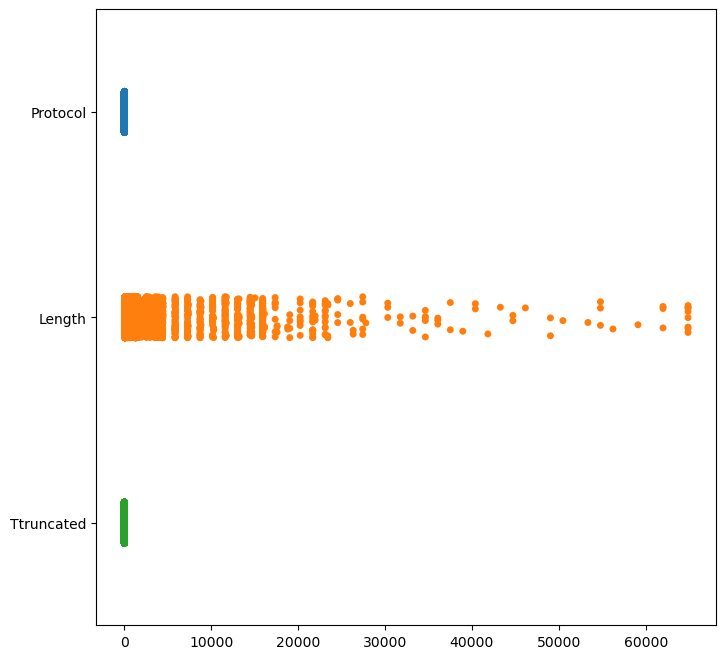

In [316]:
import seaborn as sns
X_names = ['Protocol', 'Length', 'Ttruncated']
plt.figure(figsize = [8,8])
sns.stripplot(data = pd.DataFrame(X,columns = X_names), orient = 'h')
plt.show()

In [317]:
'''neighbor_range = np.array(range(2,100))

train=[]
test=[]

k = 10

for n_neighbors in neighbor_range:
    knn = KNN(n_neighbors = n_neighbors)
    tr,te = do_Kfold(knn, X,y,k,SS())
    train.append(np.mean(tr))
    test.append(np.mean(te))

SyntaxError: incomplete input (3604703223.py, line 1)

In [ ]:
'''plt.figure(figsize=(25,12))
plt.plot(neighbor_range, train, ':xk', label='Training')
plt.plot(neighbor_range, test, ':xr', label='Testing')
plt.ylabel('Mean accuracy', fontsize=14)
plt.xlabel('$k$',fontsize=14)
plt.xticks()
plt.legend()
plt.show()

In [ ]:
'''idx = test == np.max(test)
neighbor_range[idx]

In [318]:
Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size=0.2,random_state=374)

In [319]:
ss = SS()
Xtrain = ss.fit_transform(Xtrain)
Xtest = ss.transform(Xtest)

In [320]:
knn = KNN(n_neighbors=38)

In [321]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=38)

In [322]:
print(knn.score(Xtrain, ytrain))

0.8365625


In [323]:
compare_classes(ytrain, knn.predict(Xtrain))

Accuracy = 0.84


(Predicted   Blackboard  Google  Weather  Wikipedia
 Actual                                            
 Blackboard        1298       0       34        277
 Google               0    1622        0          1
 Weather             94       0     1269        235
 Wikipedia          193       0      212       1165,
 0.8365625)

In [324]:
print(knn.score(Xtest, ytest))

0.804375


In [325]:
compare_classes(ytest, knn.predict(Xtest))

Accuracy = 0.80


(Predicted   Blackboard  Google  Weather  Wikipedia
 Actual                                            
 Blackboard         301       0       13         77
 Google               0     377        0          0
 Weather             25       0      304         73
 Wikipedia           51       0       74        305,
 0.804375)

In [326]:
from sklearn.manifold import TSNE

In [327]:
from sklearn.decomposition import PCA

In [328]:
pca = PCA()

In [329]:
pca_digits = pca.fit_transform(Xtrain)

In [330]:
pca.explained_variance_ratio_

array([0.4006265, 0.3385107, 0.2608628])

In [331]:
pca_df = pd.DataFrame(pca_digits, columns = ['PC'+str(i) for i in range(1,len(pca_digits[0])+1)])
pca_df['target'] = ytrain

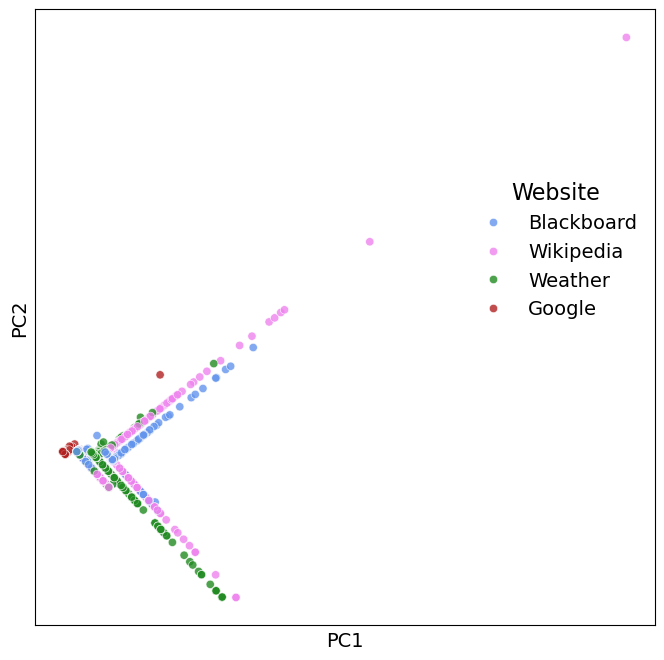

In [332]:
plt.figure(figsize = [8,8])
colors = ['cornflowerblue','violet','forestgreen','firebrick']
sns.scatterplot(data = pca_df, x = 'PC1',y = 'PC2', hue = ytrain, palette = colors, alpha = 0.8)
plt.legend(bbox_to_anchor = [1,0.75], title = 'Website', frameon = False, fontsize = 14,
          title_fontsize = 16)
plt.xlabel('PC1', fontsize = 14)
plt.ylabel('PC2', fontsize = 14)
plt.xticks([])
plt.yticks([])
plt.show()

In [333]:
tsne = TSNE(random_state = 43, perplexity = 40)

In [334]:
tsne_digits = tsne.fit_transform(Xtrain)

In [335]:
tsne_df = pd.DataFrame(tsne_digits, columns = ['TSNE1','TSNE2'])
tsne_df['target'] = ytrain

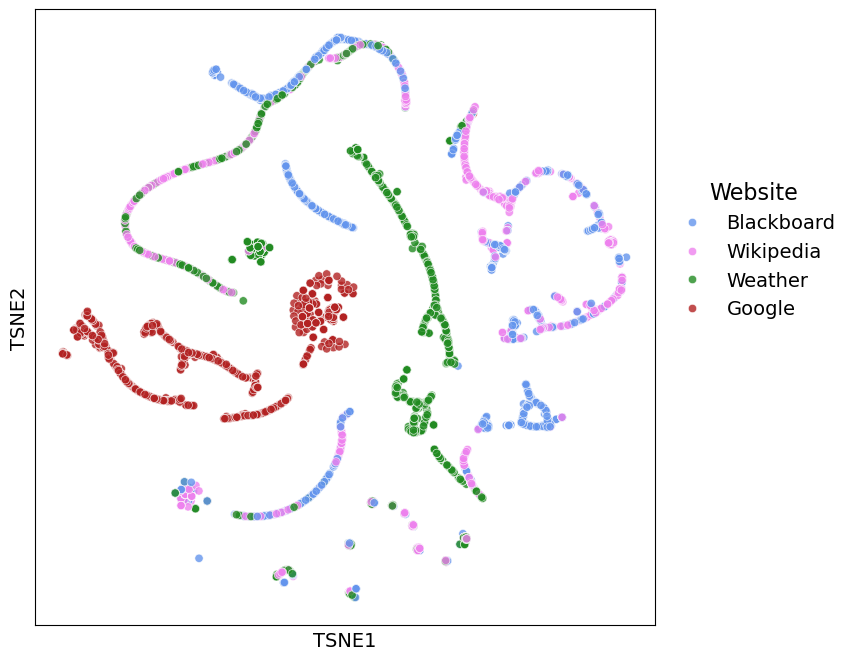

In [336]:
plt.figure(figsize = [8,8])
colors = ['cornflowerblue', 'violet','forestgreen','firebrick']
sns.scatterplot(data = tsne_df, x = 'TSNE1',y = 'TSNE2', hue = ytrain, palette = colors, alpha = 0.8)
plt.legend(bbox_to_anchor = [1,0.75], title = 'Website', frameon = False, fontsize = 14,
          title_fontsize = 16)
plt.xlabel('TSNE1', fontsize = 14)
plt.ylabel('TSNE2', fontsize = 14)
plt.xticks([])
plt.yticks([])
plt.show()

In [337]:
log_reg = LR()
log_reg.fit(Xtrain,ytrain)

LogisticRegression()

In [338]:
print(log_reg.score(Xtest, ytest))

0.49375


In [339]:
print(log_reg.score(Xtrain, ytrain))

0.509375


In [340]:
y_pred = log_reg.predict(Xtest)

# Look at the confusion matrix
compare_classes(ytest, y_pred)

Accuracy = 0.49


(Predicted   Blackboard  Google  Weather  Wikipedia
 Actual                                            
 Blackboard         155       0      225         11
 Google               0     377        0          0
 Weather            175       0      220          7
 Wikipedia          145       0      247         38,
 0.49375)

In [341]:
wikipediaV = pd.read_csv('data/wikipedia_validation.csv', sep = ',')


In [342]:
googleV = pd.read_csv('data/google_validation.csv', sep = ',')


In [343]:
blackboardV = pd.read_csv('data/blackboard_validation.csv', sep = ',')


In [344]:
weatherV = pd.read_csv('data/weather_validation.csv', sep = ',')


In [345]:
frames = [wikipediaV, googleV, blackboardV, weatherV]
data2 = pd.concat(frames)
data2.shape

(9749, 10)

In [346]:
X_df2 = data2.drop(columns = ['Source','Destination', 'Info', 'Time_Between', 'Website', 'Time', 'No.'])

In [347]:
X_df3 = X_df2.replace(['TLSv1.2', 'TLSv1.3', 'TCP', 'QUIC'], [0, 1, 2, 3])

/tmp/ipykernel_245/3162678955.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_df3 = X_df2.replace(['TLSv1.2', 'TLSv1.3', 'TCP', 'QUIC'], [0, 1, 2, 3])


In [348]:
X_df3['Protocol'].unique()

array([0, 2, 3, 1])

In [349]:
X_df3.head()

,Protocol,Length,Ttruncated
0,0,173,0.000000
1,0,113,0.000059
2,2,74,0.022886
3,0,113,0.000000
4,2,1514,0.000396


In [350]:
y2 = data2['Website'].values #turn into array

In [351]:
X2 = np.array(X_df3)

In [352]:
#ss = SS()
Xscaled = ss.transform(X2)

In [353]:
y_pred2 = knn.predict(Xscaled)

# Look at the confusion matrix
compare_classes(y2, y_pred2)

Accuracy = 0.88


(Predicted   Blackboard  Google  Weather  Wikipedia
 Actual                                            
 Blackboard         826       0       39        171
 Google               0    5213        0          4
 Weather            187       0     2203        627
 Wikipedia           67       0      104        308,
 0.8770130269771259)

In [354]:
y_pred2 = log_reg.predict(Xscaled)

# Look at the confusion matrix
compare_classes(y2, y_pred2)

Accuracy = 0.73


(Predicted   Blackboard  Google  Weather  Wikipedia
 Actual                                            
 Blackboard         436       0      564         36
 Google               0    5217        0          0
 Weather           1466       0     1463         88
 Wikipedia          116       0      324         39,
 0.7339214278387527)

In [355]:
blackboardV.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Time_Between,Website,Ttruncated
0,1,0.000000,192.168.0.178,54.208.191.177,TLSv1.2,3578,Application Data,0.000000,Blackboard,0.000000
1,2,0.020962,54.208.191.177,192.168.0.178,TCP,60,443 > 55960 [ACK] Seq=1 Ack=3525 Win=763 Len=0,0.020962,Blackboard,0.020962
2,3,0.052999,54.208.191.177,192.168.0.178,TCP,1514,443 > 55960 [ACK] Seq=1 Ack=3525 Win=771 Len...,0.032037,Blackboard,0.032037
3,4,0.053521,54.208.191.177,192.168.0.178,TCP,2974,443 > 55960 [ACK] Seq=1461 Ack=3525 Win=771 ...,0.000522,Blackboard,0.000522
4,5,0.053583,192.168.0.178,54.208.191.177,TCP,54,55960 > 443 [ACK] Seq=3525 Ack=4381 Win=4117...,0.000062,Blackboard,0.000061


In [356]:
X_bb = blackboardV.drop(columns = ['Source','Destination', 'Info', 'Time_Between', 'Website', 'Time', 'No.'])

In [357]:
X_bb2 = X_bb.replace(['TLSv1.2', 'TLSv1.3', 'TCP', 'QUIC'], [0, 1, 2, 3])

/tmp/ipykernel_245/725050301.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_bb2 = X_bb.replace(['TLSv1.2', 'TLSv1.3', 'TCP', 'QUIC'], [0, 1, 2, 3])


In [358]:
X_bb2['Protocol'].unique()

array([0, 2])

In [359]:
ybb = blackboardV['Website'].values #turn into array

In [360]:
Xbb = np.array(X_bb2)

In [361]:
#ss = SS()
Xbbscaled = ss.transform(Xbb)

In [362]:
ybb_pred2 = knn.predict(Xbbscaled)

# Look at the confusion matrix
compare_classes(ybb, ybb_pred2)

Accuracy = 0.80


(Predicted   Blackboard  Weather  Wikipedia
 Actual                                    
 Blackboard         826       39        171,
 0.7972972972972973)

In [363]:
ybb_pred2 = log_reg.predict(Xbbscaled)

# Look at the confusion matrix
compare_classes(ybb, ybb_pred2)

Accuracy = 0.42


(Predicted   Blackboard  Weather  Wikipedia
 Actual                                    
 Blackboard         436      564         36,
 0.42084942084942084)

In [364]:
X_bb = weatherV.drop(columns = ['Source','Destination', 'Info', 'Time_Between', 'Website', 'Time', 'No.'])
X_bb2 = X_bb.replace(['TLSv1.2', 'TLSv1.3', 'TCP', 'QUIC'], [0, 1, 2, 3])
ybb = weatherV['Website'].values #turn into array
Xbb = np.array(X_bb2)
#ss = SS()
Xbbscaled = ss.transform(Xbb)
ybb_pred2 = knn.predict(Xbbscaled)

# Look at the confusion matrix
compare_classes(ybb, ybb_pred2)

/tmp/ipykernel_245/2016137507.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_bb2 = X_bb.replace(['TLSv1.2', 'TLSv1.3', 'TCP', 'QUIC'], [0, 1, 2, 3])


Accuracy = 0.73


(Predicted  Blackboard  Weather  Wikipedia
 Actual                                   
 Weather           187     2203        627,
 0.730195558501823)

In [365]:
ybb_pred2 = log_reg.predict(Xbbscaled)

# Look at the confusion matrix
compare_classes(ybb, ybb_pred2)

Accuracy = 0.48


(Predicted  Blackboard  Weather  Wikipedia
 Actual                                   
 Weather          1466     1463         88,
 0.48491879350348027)

In [366]:
X_bb = googleV.drop(columns = ['Source','Destination', 'Info', 'Time_Between', 'Website', 'Time', 'No.'])
X_bb2 = X_bb.replace(['TLSv1.2', 'TLSv1.3', 'TCP', 'QUIC'], [0, 1, 2, 3])
ybb = googleV['Website'].values #turn into array
Xbb = np.array(X_bb2)
#ss = SS()
Xbbscaled = ss.transform(Xbb)
ybb_pred2 = knn.predict(Xbbscaled)

# Look at the confusion matrix
compare_classes(ybb, ybb_pred2)

/tmp/ipykernel_245/178326961.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_bb2 = X_bb.replace(['TLSv1.2', 'TLSv1.3', 'TCP', 'QUIC'], [0, 1, 2, 3])


Accuracy = 1.00


(Predicted  Google  Wikipedia
 Actual                      
 Google       5213          4,
 0.9992332758290206)

In [367]:
ybb_pred2 = log_reg.predict(Xbbscaled)

# Look at the confusion matrix
compare_classes(ybb, ybb_pred2)

Accuracy = 1.00


(Predicted  Google
 Actual           
 Google       5217,
 1.0)

In [368]:
X_bb = wikipediaV.drop(columns = ['Source','Destination', 'Info', 'Time_Between', 'Website', 'Time', 'No.'])
X_bb2 = X_bb.replace(['TLSv1.2', 'TLSv1.3', 'TCP', 'QUIC'], [0, 1, 2, 3])
ybb = wikipediaV['Website'].values #turn into array
Xbb = np.array(X_bb2)
#ss = SS()
Xbbscaled = ss.transform(Xbb)
ybb_pred2 = knn.predict(Xbbscaled)

# Look at the confusion matrix
compare_classes(ybb, ybb_pred2)

Accuracy = 0.64


/tmp/ipykernel_245/2857074402.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_bb2 = X_bb.replace(['TLSv1.2', 'TLSv1.3', 'TCP', 'QUIC'], [0, 1, 2, 3])


(Predicted  Blackboard  Weather  Wikipedia
 Actual                                   
 Wikipedia          67      104        308,
 0.6430062630480167)

In [369]:
ybb_pred2 = log_reg.predict(Xbbscaled)

# Look at the confusion matrix
compare_classes(ybb, ybb_pred2)

Accuracy = 0.08


(Predicted  Blackboard  Weather  Wikipedia
 Actual                                   
 Wikipedia         116      324         39,
 0.081419624217119)